<a href="https://colab.research.google.com/github/Shahrukh2016/Cardiovascular_Risk_Prediction/blob/main/IndividualColab_NetflixMoviesAndTvShowsClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type - Unsupervised Learning**
##### **Contribution - Individual Notebook**
##### **Team Member 1 - Shahrukh Ahmad**
##### **Team Member 2 - Manjiri Kulkarni**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/Shahrukh2016/Netflix_Movies_and_TV_Shows_Clustering

# **Problem Statement**


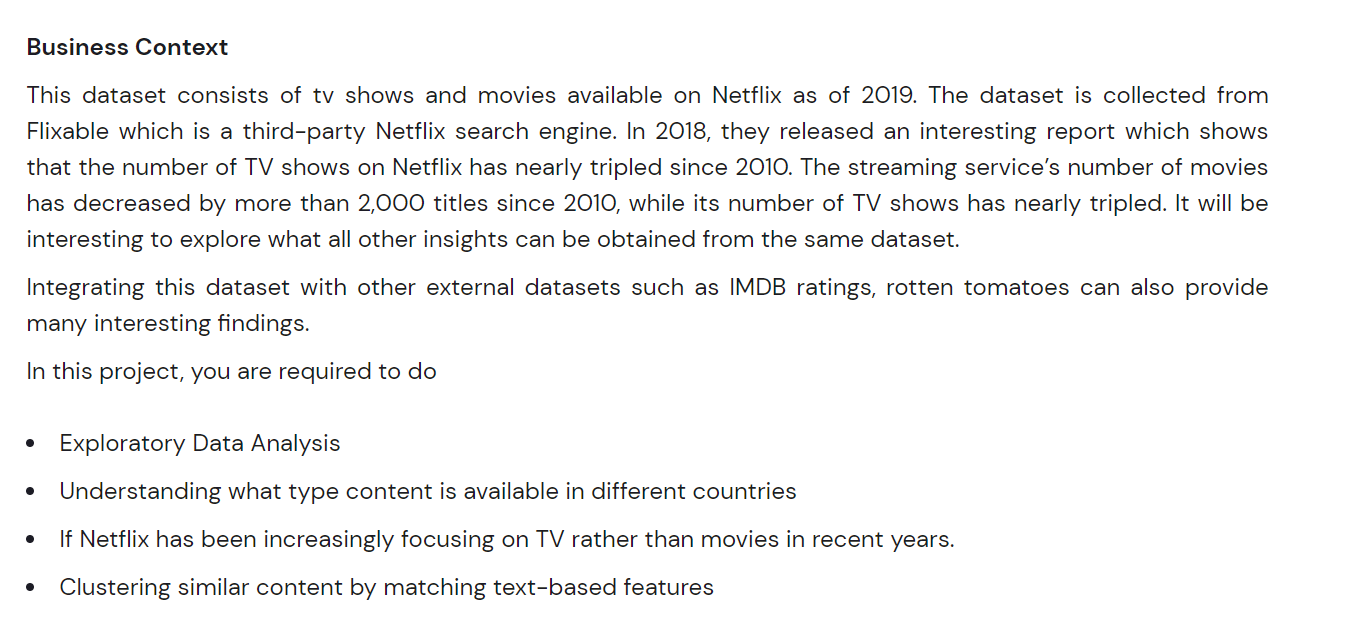

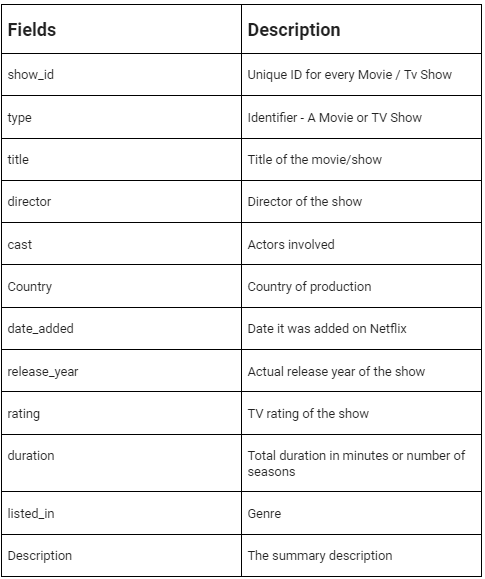

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
# For data manipulation and visualisation
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
%matplotlib inline

### Dataset Loading

In [ ]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capstone Projects/CP4_NetflixMoviesAndTvShowsClustering/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv", index_col='show_id')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f"Cardiovascular Dataset: Rows= {df.shape[0]}, Columns= {df.shape[1]}")

Cardiovascular Dataset: Rows= 7787, Columns= 11


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7787 entries, s1 to s7787
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          7787 non-null   object
 1   title         7787 non-null   object
 2   director      5398 non-null   object
 3   cast          7069 non-null   object
 4   country       7280 non-null   object
 5   date_added    7777 non-null   object
 6   release_year  7787 non-null   int64 
 7   rating        7780 non-null   object
 8   duration      7787 non-null   object
 9   listed_in     7787 non-null   object
 10  description   7787 non-null   object
dtypes: int64(1), object(10)
memory usage: 730.0+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print(f"The total number of duplicated observations in the dataset: {df.duplicated().sum()}")

The total number of duplicated observations in the dataset: 0


It's good to see that we do not have any duplicated observation in our dataset.

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print("-"*50)
print("Null value count in each of the variable: ")
print("-"*50)
print(df.isna().sum())
print("-"*50)

# Percentage of null values in each category
print("Percentage of null values in each variable: ")
print("-"*50)
null_count_by_variable = df.isnull().sum()/len(df)
print(f"{null_count_by_variable*100}%")
print("-"*50)

--------------------------------------------------
Null value count in each of the variable: 
--------------------------------------------------
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64
--------------------------------------------------
Percentage of null values in each variable: 
--------------------------------------------------
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64%
--------------------------------------------------


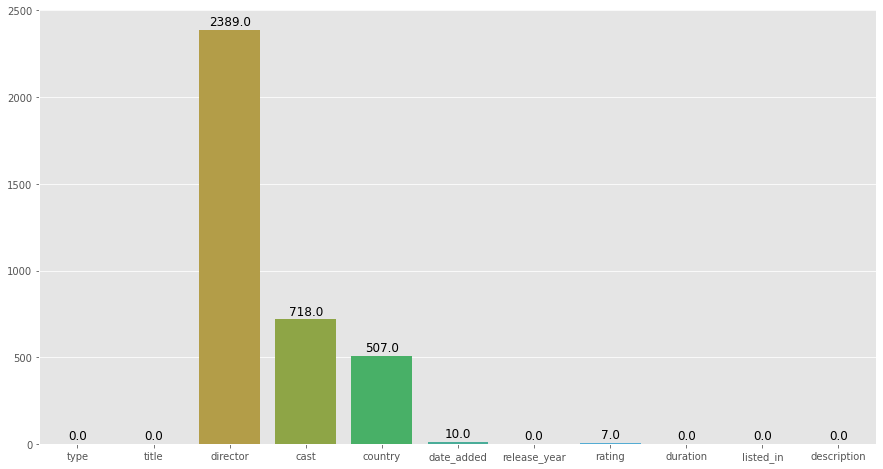

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(15,8))
plots= sns.barplot(x=df.columns,y=df.isna().sum())

for bar in plots.patches:
      plots.annotate(bar.get_height(),
                     (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                     size=12, xytext=(0, 8),
                     textcoords='offset points')
plt.show()

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print(f"Available columns:\n{df.columns.to_list()}")

Available columns:
['type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [ ]:
# Dataset Describe
df.describe(include='all')

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description 

Answer Here

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
print(f"The number of unique values in: ")
print("-"*35)
for i in df.columns:
  print(f"'{i}' : {df[i].nunique()}")

The number of unique values in: 
-----------------------------------
'type' : 2
'title' : 7787
'director' : 4049
'cast' : 6831
'country' : 681
'date_added' : 1565
'release_year' : 73
'rating' : 14
'duration' : 216
'listed_in' : 492
'description' : 7769


## 3. ***Data Wrangling***

### Data Wrangling Code

####1.  Separating multiple values from 'country' and 'listed_in'

In [ ]:
# Checking various bins in country feature
df['country'].value_counts()

United States                                                   2555
India                                                            923
United Kingdom                                                   397
Japan                                                            226
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

In [ ]:
# Checking various bins in listed_in feature
df['listed_in'].value_counts()

Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
Stand-Up Comedy & Talk Shows, TV Mysteries, TV Sci-Fi & Fantasy                      1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: listed_in, Length: 492, dtype: int64

In [ ]:
# Separating each country and listed_in from cluster and putting it in respective bin
df['country'] = df['country'].apply(lambda x: x.split(',')[0])
df['listed_in'] = df['listed_in'].apply(lambda x: x.split(',')[0])

####2.  Handling Null values from each feature

In [ ]:
# Checking the count of null value in order to deal them accordingly
df.isna().sum()

type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

##### 1. Director

In [ ]:
df[df['director'].isna()].sample(10)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s4940,TV Show,Power Rangers RPM,NaN,"Eka Darville, Ari Boyland, Rose McIver, Milo C...",United States,"January 1, 2016",2009,TV-Y7,1 Season,Kids' TV,"The Power Rangers' new member, Dillon, isn't s..."
s3775,TV Show,Love Rain,NaN,"Keun-suk Jang, Yoon-ah Im, Shi-hoo Kim, Eun-se...",South Korea,"May 1, 2018",2012,TV-PG,1 Season,"International TV Shows, Korean TV Shows, Roman...","A story of two couples' journey of new love, l..."
s7008,TV Show,The Witcher: A Look Inside the Episodes,NaN,"Henry Cavill, Anya Chalotra, Freya Allan, Laur...",NaN,"September 2, 2020",2020,TV-MA,1 Season,"Docuseries, TV Sci-Fi & Fantasy",With series creator Lauren S. Hissrich as your...
s6203,TV Show,The Casketeers,NaN,NaN,New Zealand,"June 21, 2019",2019,TV-14,2 Seasons,"International TV Shows, Reality TV",Māori funeral directors Francis and Kaiora Tip...
s334,TV Show,Against the Tide,NaN,"Christopher Lee, Rui En, Desmond Tan, Zheng Ge...",Singapore,"July 1, 2017",2014,TV-14,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",A detective and a psychologist investigating a...
s4772,TV Show,Parasyte: The Maxim,NaN,"Nobunaga Shimazaki, Aya Hirano, Kana Hanazawa,...",Japan,"May 15, 2020",2014,TV-MA,1 Season,"Anime Series, International TV Shows, TV Horror",A teenager battles an onslaught of parasites f...
s6711,TV Show,The Night Shift,NaN,"Eoin Macken, Jill Flint, Freddy Rodríguez, Ken...",United States,"June 7, 2018",2017,TV-14,4 Seasons,TV Dramas,"After returning from a dangerous tour of duty,..."
s1292,TV Show,Chasing Monsters,NaN,Cyril Chauquet,Canada,"December 15, 2017",2016,TV-PG,2 Seasons,"Docuseries, Reality TV, Science & Nature TV",Adventurer Cyril Chauquet seeks out the most c...
s5827,TV Show,Storage Wars: Northern Treasures,NaN,"Ursula Stolf, Paul Kenny, Bogart Kenny, Roy Di...",United States,"July 22, 2019",2015,TV-MA,1 Season,"International TV Shows, Reality TV","In Canada, a colorful collection of treasure-s..."


In [ ]:
print(df[df['director'].isna()]['type'].value_counts())
print(df[df['director'].isna()]['country'].value_counts())
print(df[df['director'].isna()]['rating'].value_counts())

TV Show    2226
Movie       163
Name: type, dtype: int64
United States                                    717
United Kingdom                                   196
Japan                                            148
South Korea                                      139
India                                             75
                                                ... 
United States, India                               1
Chile, Italy                                       1
Canada, United Kingdom                             1
France, Australia, Germany                         1
United States, France, South Korea, Indonesia      1
Name: country, Length: 177, dtype: int64
TV-MA       985
TV-14       636
TV-PG       301
TV-Y7       182
TV-Y        181
TV-G         88
NR            5
R             4
TV-Y7-FV      2
NC-17         1
PG-13         1
Name: rating, dtype: int64


In [ ]:
df[(df['director'].isna()) & (df['type']=='TV Show') & (df['country']=='United States') & (df['rating']=='TV-MA')]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s27,TV Show,(Un)Well,NaN,NaN,United States,"August 12, 2020",2020,TV-MA,1 Season,Reality TV,This docuseries takes a deep dive into the luc...
s30,TV Show,#blackAF,NaN,"Kenya Barris, Rashida Jones, Iman Benson, Genn...",United States,"April 17, 2020",2020,TV-MA,1 Season,TV Comedies,Kenya Barris and his family navigate relations...
s64,TV Show,13 Reasons Why,NaN,"Dylan Minnette, Katherine Langford, Kate Walsh...",United States,"June 5, 2020",2020,TV-MA,4 Seasons,"Crime TV Shows, TV Dramas, TV Mysteries","After a teenage girl's perplexing suicide, a c..."
s65,TV Show,13 Reasons Why: Beyond the Reasons,NaN,"Dylan Minnette, Katherine Langford, Kate Walsh...",United States,"August 23, 2019",2019,TV-MA,3 Seasons,"Crime TV Shows, Docuseries","Cast members, writers, producers and mental he..."
s131,TV Show,60 Days In,NaN,NaN,United States,"November 1, 2020",2019,TV-MA,1 Season,Reality TV,"Recruited by a sheriff, volunteers infiltrate ..."
...,...,...,...,...,...,...,...,...,...,...,...
s7585,TV Show,When They See Us,NaN,"Asante Blackk, Caleel Harris, Ethan Herisse, J...",United States,"May 31, 2019",2019,TV-MA,1 Season,"Crime TV Shows, TV Dramas",Five teens from Harlem become trapped in a nig...
s7607,TV Show,Who Killed Malcolm X?,NaN,NaN,United States,"February 7, 2020",2020,TV-MA,1 Season,"Crime TV Shows, Docuseries",Decades after the assassination of African Ame...
s7623,TV Show,Wild Wild Country,NaN,NaN,United States,"March 16, 2018",2018,TV-MA,1 Season,"Crime TV Shows, Docuseries",When a controversial cult leader builds a utop...


In [ ]:
df[(df['type']=='TV Show') & (df['country']=='United States') & (df['rating']=='TV-MA')].sample(20)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s5557,TV Show,She's Gotta Have It,NaN,"DeWanda Wise, Cleo Anthony, Lyriq Bent, Anthon...",United States,"May 24, 2019",2018,TV-MA,2 Seasons,"Romantic TV Shows, TV Comedies, TV Dramas",Nola Darling struggles to stay true to herself...
s2787,TV Show,Home Game,NaN,NaN,United States,"June 26, 2020",2020,TV-MA,1 Season,Docuseries,This docuseries profiles unique and dangerous ...
s2208,TV Show,Flint Town,NaN,NaN,United States,"March 2, 2018",2018,TV-MA,1 Season,"Docuseries, Science & Nature TV","Over a two-year period, filmmakers embedded wi..."
s4341,TV Show,My Next Guest Needs No Introduction With David...,NaN,"President Barack Obama, George Clooney, Malala...",United States,"October 21, 2020",2020,TV-MA,3 Seasons,Stand-Up Comedy & Talk Shows,TV legend David Letterman teams up with fascin...
s6097,TV Show,The Assassination of Gianni Versace,NaN,"Edgar Ramírez, Darren Criss, Ricky Martin, Pen...",United States,"March 6, 2019",2018,TV-MA,1 Season,"Crime TV Shows, TV Dramas, TV Thrillers","Defining moments in Andrew Cunanan's life, sta..."
s2844,TV Show,How to Fix a Drug Scandal,NaN,NaN,United States,"April 1, 2020",2020,TV-MA,1 Season,"Crime TV Shows, Docuseries",Two drug lab chemists' shocking crimes cripple...
s5102,TV Show,Rapture,NaN,"Logic, Nas, Dave West, T.I., G-Eazy, 2 Chainz,...",United States,"March 30, 2018",2018,TV-MA,1 Season,Docuseries,Groundbreaking artists share their life storie...
s4553,TV Show,Nurse Jackie,NaN,"Edie Falco, Merritt Wever, Paul Schulze, Peter...",United States,"December 31, 2015",2015,TV-MA,7 Seasons,"TV Comedies, TV Dramas",A flawed but dedicated ER nurse works in a New...
s30,TV Show,#blackAF,NaN,"Kenya Barris, Rashida Jones, Iman Benson, Genn...",United States,"April 17, 2020",2020,TV-MA,1 Season,TV Comedies,Kenya Barris and his family navigate relations...


In [ ]:
df[(df['type']=='TV Show') & (df['country']=='United States') & (df['rating']=='TV-MA')]['director'].value_counts()

Stan Lathan                                2
Eric Abrams                                1
Dan Forrer                                 1
Eric Goode, Rebecca Chaiklin               1
Ken Burns, Lynn Novick                     1
Julia Willoughby Nason, Jenner Furst       1
Alexx Media                                1
Marcus Raboy                               1
David Schalko                              1
Thierry Demaizière, Alban Teurlai          1
Ryan Polito                                1
Joe Berlinger, Bruce Sinofsky              1
Lynn Novick                                1
Jill Bauer, Ronna Gradus, Rashida Jones    1
Eli Roth                                   1
Danny Cannon                               1
Laurent Bouzereau                          1
Trey Borzillieri, Barbara Schroeder        1
Joel Gallen, Tig Notaro                    1
Lee Toland Krieger                         1
Name: director, dtype: int64

In [ ]:
df[(df['director']=='Stan Lathan')& (df['type']=='TV Show') & (df['country']=='United States') & (df['rating']=='TV-MA')]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1630,TV Show,Dave Chappelle,Stan Lathan,Dave Chappelle,United States,"March 21, 2017",2017,TV-MA,1 Season,"Stand-Up Comedy & Talk Shows, TV Comedies",Comedy icon Dave Chappelle makes his triumphan...
s1631,TV Show,Dave Chappelle: Equanimity & The Bird Revelation,Stan Lathan,Dave Chappelle,United States,"December 31, 2017",2017,TV-MA,1 Season,"Stand-Up Comedy & Talk Shows, TV Comedies",Comedy titan Dave Chappelle caps a wild year w...


In [ ]:
# Write your code to make your dataset analysis ready.
data['director'].fillna('Not Known', inplace=True)
data['cast'].fillna('No cast',inplace=True)
data['country'].fillna(data['country'].mode()[0],inplace=True)

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***